This notebook is a follow up analysis in response to the removal of movie outliers from the revenue values of the dataset.<br>
As before, I will break up the actors into various groups, based on their average movie revenues.<br>
Then, plots will be made, showing how different predictor variables are distributed, with respect to these groups of actors.<br>
These will be accompanied by correlation estimates, that will include confidence intervals, derived through resampling.<br>
Next, I will focus on how the individual movie genres are distributed, among these actor categorizations.<br>
Finally, I will dive deeper into the data to observe which particular actors are contributing to these trends.<br>
The comparison of the results in this notebook to one before outlier removal will be done in the final written report.

In [1]:
# set cell display width
from IPython.display import display, HTML
display(HTML('<style>.container { width: 930px !important; }</style>'))

In [2]:
# import ML tools
import pandas as pd
import numpy as np
from collections import defaultdict

In [3]:
# import plotting tools
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.pylabtools import figsize
# set grid size and style
figsize(12, 4)
sns.set_style('whitegrid')

Use "mp.colors(<index>)" as color attribute for Seaborn plots.
This is your color palette...


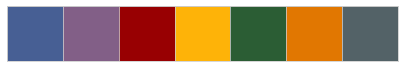

In [4]:
# import custom palette
import my_palette as mp

In [5]:
# set option for palette argument
my_palette = ['xkcd:' + c for c in mp.my_colors]

In [6]:
# read in dataset
df = pd.read_json('../data/capstone2_optimized_target_ds.json')

In [7]:
# observe dataset dimensionality
df.shape

(11610, 28)

In [8]:
# change gender labels to be human readable
df['gender'].replace([0, 1], ['male', 'female'], inplace=True)

The target values have been transformed for model optimization, using the natural log function.<br>
I will convert them back to dollar values for this explanatory notebook.

In [9]:
# convert log target to dollars
df['revenue'] = np.exp(df['revenue'])

In [10]:
# observe a bit of the data
df.iloc[:3, :11]

,revenue,budget,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
2,1.747277e+07,8.778750e+06,45.773425,male,1.400000,13.497800,1997.000000,86.200000,1,6.620000,556.600000
3,1.142995e+08,8.345003e+07,56.479322,male,0.783784,22.042243,1998.540541,118.027027,1,6.562162,1868.351351
4,1.366157e+07,2.402895e+07,38.717047,female,4.000000,8.555667,1995.111111,102.000000,1,6.044444,467.000000


I will categorize the actors with respect to their earning history.<br>
Top actors will be the upper 10% of the profitability figures.<br>
Elite actors will be the top 1% of that category.<br>
I will use the full dataset as the third category to include all actors.<br>
For clarity, elite actors are included in the top tier as well.

In [11]:
# extract top profitable actors
top_df = df[df['revenue'] >= df['revenue'].quantile(0.9)]

In [12]:
# extract elite profitable actors
elite_df = df[df['revenue'] >= df['revenue'].quantile(0.99)]

In [13]:
# recall features
df.columns

Index(['revenue', 'budget', 'age', 'gender', 'order', 'popularity',
       'release_date', 'runtime', 'usa', 'vote_average', 'vote_count',
       'action', 'adventure', 'animation', 'comedy', 'crime', 'drama',
       'family', 'fantasy', 'history', 'horror', 'music', 'mystery', 'romance',
       'science_fiction', 'thriller', 'war', 'western'],
      dtype='object')

As movie genres were derived from aggregated sums, as opposed to averages, I will observe their statistics, separately.

In [14]:
# create list of non-genre feature names
non_genre_lst = ['revenue', 'budget', 'age', 'gender', 'order', 'popularity',
                 'release_date', 'runtime', 'usa', 'vote_average', 'vote_count']

In [15]:
# create list of genre feature names
genre_lst = np.setdiff1d(df.columns, non_genre_lst)

I will observe the non-genre statistics, first.

In [16]:
# observe non-genre statistics for all actors
df[non_genre_lst].describe(
    percentiles=[0.5]).drop('count').T.apply(
    lambda x: np.round(x, decimals=2))

,mean,std,min,50%,max
revenue,82409223.23,1.214210e+08,1.24,43460804.30,9.996018e+08
budget,38355861.29,3.459472e+07,1.60,30727976.19,3.139207e+08
age,37.86,1.397000e+01,1.18,36.15,9.896000e+01
order,4.41,2.110000e+00,0.00,4.50,8.000000e+00
popularity,12.97,7.690000e+00,0.60,12.72,2.052800e+02
release_date,1996.30,2.010000e+01,1913.00,2002.67,2.020000e+03
runtime,107.68,1.716000e+01,70.00,105.50,2.480000e+02
usa,0.45,5.000000e-01,0.00,0.00,1.000000e+00
vote_average,6.39,8.400000e-01,1.00,6.40,1.000000e+01
vote_count,1222.96,1.605200e+03,1.00,701.33,2.261300e+04


The average movie revenue across all actors is $82,409,223.23.

In [17]:
# observe non-genre statistics for top profitable actors
top_df[non_genre_lst].describe(
    percentiles=[0.5]).drop('count').T.apply(
    lambda x: np.round(x, decimals=2))

,mean,std,min,50%,max
revenue,3.740264e+08,1.814584e+08,1.974387e+08,3.126097e+08,9.996018e+08
budget,7.752160e+07,5.639190e+07,1.792723e+04,6.352271e+07,3.139207e+08
age,3.810000e+01,1.542000e+01,2.370000e+00,3.680000e+01,9.896000e+01
order,4.940000e+00,2.210000e+00,0.000000e+00,5.000000e+00,8.000000e+00
popularity,1.950000e+01,1.115000e+01,6.200000e-01,1.766000e+01,1.808700e+02
release_date,1.991900e+03,2.201000e+01,1.915000e+03,1.997500e+03,2.020000e+03
runtime,1.164000e+02,2.300000e+01,7.100000e+01,1.130000e+02,2.480000e+02
usa,4.000000e-01,4.900000e-01,0.000000e+00,0.000000e+00,1.000000e+00
vote_average,6.800000e+00,7.200000e-01,4.300000e+00,6.800000e+00,8.600000e+00
vote_count,3.170590e+03,3.064220e+03,2.000000e+00,2.354000e+03,2.261300e+04


The revenue cut off value is $197,438,700 to be considered a top actor.

The average movie revenue for this group is $374,026,400.

In [18]:
# observe non-genre statistics for elite profitable actors
elite_df[non_genre_lst].describe(
    percentiles=[0.5]).drop('count').T.apply(
    lambda x: np.round(x, decimals=2))

,mean,std,min,50%,max
revenue,7.999432e+08,97462276.92,6.485432e+08,7.846640e+08,9.996018e+08
budget,1.017962e+08,72687792.23,1.171121e+07,7.363641e+07,3.139207e+08
age,3.810000e+01,17.37,7.130000e+00,3.551000e+01,8.580000e+01
order,4.870000e+00,2.37,0.000000e+00,5.000000e+00,8.000000e+00
popularity,2.601000e+01,9.28,7.940000e+00,2.461000e+01,4.838000e+01
release_date,1.990670e+03,18.98,1.953000e+03,1.992000e+03,2.018500e+03
runtime,1.165800e+02,21.34,7.600000e+01,1.170000e+02,2.000000e+02
usa,3.000000e-01,0.46,0.000000e+00,0.000000e+00,1.000000e+00
vote_average,7.170000e+00,0.57,5.900000e+00,7.200000e+00,8.300000e+00
vote_count,5.914580e+03,4976.30,1.830000e+02,4.642000e+03,2.261300e+04


The revenue cut off value is $648,543,200 to be considered an elite actor.

The average movie revenue for this group is $799,943,200.

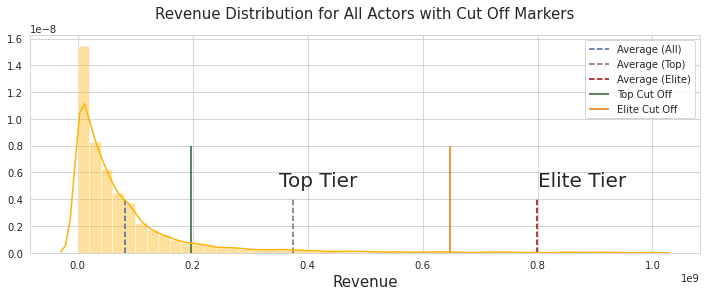

In [19]:
# plot revenue distribution, showing ranges of actor tiers

plt.text(3.5e8, 5e-9, 'Top Tier', fontsize=20)
plt.text(8e8, 5e-9, 'Elite Tier', fontsize=20)

plt.vlines(x=np.mean(df['revenue']), ymin=0, ymax=4e-9, color=mp.colors(0), 
           label='Average (All)', linestyles='dashed')
plt.vlines(x=np.mean(top_df['revenue']), ymin=0, ymax=4e-9, color=mp.colors(1), 
           label='Average (Top)', linestyles='dashed')
plt.vlines(x=np.mean(elite_df['revenue']), ymin=0, ymax=4e-9, color=mp.colors(2), 
           label='Average (Elite)', linestyles='dashed')
plt.vlines(x=np.min(top_df['revenue']), ymin=0, ymax=8e-9, color=mp.colors(4), 
           label='Top Cut Off')
plt.vlines(x=np.min(elite_df['revenue']), ymin=0, ymax=8e-9, color=mp.colors(5), 
           label='Elite Cut Off')
sns.distplot(df['revenue'], color=mp.colors(3))

plt.xlabel('Revenue', fontsize='15')

plt.legend()
plt.title('Revenue Distribution for All Actors with Cut Off Markers', 
          fontsize=15, y=1.05);

The top tier covers the widest range of revenues.

Now, I'll observe the genre statistics.

In [20]:
# observe genre statistics for all actors
df[genre_lst].describe(
    percentiles=[0.5]).drop('count').T.apply(
    lambda x: np.round(x, decimals=2))

,mean,std,min,50%,max
action,0.94,1.89,0.0,0.0,32.0
adventure,0.63,1.31,0.0,0.0,17.0
animation,0.17,0.62,0.0,0.0,11.0
comedy,1.28,2.47,0.0,1.0,34.0
crime,0.58,1.35,0.0,0.0,26.0
drama,1.65,2.80,0.0,1.0,33.0
family,0.36,0.94,0.0,0.0,15.0
fantasy,0.34,0.83,0.0,0.0,13.0
history,0.16,0.52,0.0,0.0,9.0
horror,0.40,0.77,0.0,0.0,11.0


There was one actor who was in 36 thrillers.

I'll import the dataset, as it was before aggregation, to find specific actors and movies.

In [21]:
# read in full actor reference dataset
actor_df = pd.read_json('../data/capstone2_optimized_target_ref.json')
actor_df.head(8)

,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,...,fantasy,history,horror,music,mystery,romance,science_fiction,thriller,war,western
0,2,Mark Hamill,16121,The Big Red One,2.273880e+07,1.419948e+07,8.539315e+06,28.674100,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2,Mark Hamill,14919,Batman: Mask of the Phantasm,9.944670e+06,1.062202e+07,-6.773465e+05,42.251381,0,1,...,0,0,0,0,1,0,0,1,0,0
4,2,Mark Hamill,16220,Wizards,3.930685e+07,5.240914e+06,3.406594e+07,25.377660,0,4,...,1,0,0,0,0,0,1,0,0,0
9,2,Mark Hamill,533642,Child's Play,4.524793e+07,1.007699e+07,3.517094e+07,67.733081,0,0,...,0,0,1,0,0,0,0,0,0,0
10,2,Mark Hamill,382322,Batman: The Killing Joke,4.049338e+06,3.754353e+06,2.949849e+05,64.830900,0,1,...,0,0,0,0,0,0,0,0,0,0
11,3,Harrison Ford,2655,What Lies Beneath,4.353007e+08,1.493721e+08,2.859286e+08,58.024463,0,0,...,0,0,1,0,1,0,0,1,0,0
12,3,Harrison Ford,27569,Extraordinary Measures,1.802779e+07,3.692683e+07,-1.889904e+07,67.527738,0,0,...,0,0,0,0,0,0,0,0,0,0
14,3,Harrison Ford,10675,Frantic,3.924672e+07,4.450259e+07,-5.255867e+06,45.597103,0,0,...,0,0,0,0,0,0,0,1,0,0


In [22]:
# get name of actor in 36 thrillers
actor_df[actor_df['person_id'].isin(
    df[df['thriller'] == 36].index)]['name'].unique().tolist()

['Bruce Willis']

In [23]:
# observe genre statistics for top profitable actors
top_df[genre_lst].describe(
    percentiles=[0.5]).drop('count').T.apply(
    lambda x: np.round(x, decimals=2))

,mean,std,min,50%,max
action,0.60,1.18,0.0,0.0,19.0
adventure,0.59,1.05,0.0,0.0,14.0
animation,0.20,0.61,0.0,0.0,7.0
comedy,0.59,1.11,0.0,0.0,13.0
crime,0.19,0.52,0.0,0.0,5.0
drama,0.58,1.20,0.0,0.0,23.0
family,0.35,0.80,0.0,0.0,8.0
fantasy,0.25,0.63,0.0,0.0,5.0
history,0.07,0.30,0.0,0.0,4.0
horror,0.14,0.38,0.0,0.0,3.0


One top actor was in 23 dramas.

In [24]:
# get name of top actor in 23 dramas
actor_df[actor_df['person_id'].isin(
    top_df[top_df['drama'] == 23].index)]['name'].unique().tolist()

['Tom Cruise']

In [25]:
# observe genre statistics for elite actors
elite_df[genre_lst].describe(
    percentiles=[0.5]).drop('count').T.apply(
    lambda x: np.round(x, decimals=2))

,mean,std,min,50%,max
action,0.50,0.75,0.0,0.0,6.0
adventure,0.59,0.76,0.0,1.0,6.0
animation,0.25,0.51,0.0,0.0,3.0
comedy,0.35,0.53,0.0,0.0,2.0
crime,0.05,0.22,0.0,0.0,1.0
drama,0.22,0.44,0.0,0.0,2.0
family,0.33,0.56,0.0,0.0,3.0
fantasy,0.27,0.48,0.0,0.0,2.0
history,0.01,0.09,0.0,0.0,1.0
horror,0.02,0.13,0.0,0.0,1.0


Action and adventure movies comprised at least half of the roles for elite actors, on average.

There was an elite actor in 6 action films.

In [26]:
# get name of actor in 6 action movies
actor_df[actor_df['person_id'].isin(
    elite_df[elite_df['action'] == 6].index)]['name'].unique().tolist()

['Bernard Lee']

Bernard Lee played M in the first 11 James Bond Movies.

There are some trends in the data.<br>
I will explore a few of them with visualizations.

 > **Rating Score/Revenue (by Gender)**

I will generate Pearson correlation coefficients and 95% confidence intervals to back up my observations.

In [27]:
# set DataFrame index names
df.index.name = 'all_actors'
top_df.index.name = 'top_actors'
elite_df.index.name = 'elite_actors'

In [28]:
def pearson_r(data1, data2):
    """Compute correlation coefficient between 2 arrays"""
    corr_mat = np.corrcoef(data1, data2)
    
    return corr_mat[0, 1]

In [29]:
def draw_bs_pairs(data1, data2, func, size=1):
    """Perform pairs bootstrap for a single statistic."""
    # convert Series to numpy array
    x = np.array(data1)
    y = np.array(data2)
    # get array of indices for sampling
    inds = np.arange(len(x))
    # initialize pairs replicates
    bs_replicates = np.empty(size)
    # generate pairs replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_replicates[i] = func(bs_x, bs_y)

    return bs_replicates

In [30]:
def get_tier_correlations(data_lst, col1, col2, func, size=1):
    """Return DataFrame with correlations between given variables for given datasets"""
    # instantiate default dict to hold data
    corr_dict = defaultdict(list)
    # instantiate list ot hold DataFrame names
    df_index = []
    for data in data_lst:
        # convert categorical to numeric
        data_copy = data.copy()
        data_copy['gender'] = data['gender'].replace(['male', 'female'], [0, 1])
        data = data_copy
        # get observed correlation coefficient between 2 variables
        corr_obs = np.round(
            pearson_r(data[col1], data[col2]), decimals=3)
        # get Pearson coefficients of chosen number of bootstrap replicate pairs
        corr_replicates = draw_bs_pairs(data[col1], data[col2], pearson_r, size)
        # compute Pearson coefficient with 95% confidence intervals
        conf_int = np.round(
            np.percentile(corr_replicates, [2.5, 97.5]), decimals=3)
        # store results in default dict
        corr_dict['observed_pearson'].append(corr_obs)
        corr_dict['95%_conf_interval'].append(conf_int)
        # extract index name to identify dataset
        dataset_name = data.index.name
        df_index.append(dataset_name)
    # convert default dict to DataFrame
    corr_df = pd.DataFrame(corr_dict, index=df_index)
    
    return corr_df

In [31]:
# get correlation for full dataset between revenue and average rating score
get_tier_correlations([df], 'revenue', 'vote_average', pearson_r, 10000)

,observed_pearson,95%_conf_interval
all_actors,0.197,"[0.181, 0.213]"


There is a weak correlation between revenue and average rating score in the full dataset.

In [32]:
# get correlation for full dataset between revenue and gender
get_tier_correlations([df], 'revenue', 'gender', pearson_r, 10000)

,observed_pearson,95%_conf_interval
all_actors,-0.021,"[-0.039, -0.002]"


The is almost no correlation between revenue and gender in the full dataset.

In [33]:
# get correlation for full dataset between average rating score and gender
get_tier_correlations([df], 'vote_average', 'gender', pearson_r, 10000)

,observed_pearson,95%_conf_interval
all_actors,0.005,"[-0.014, 0.023]"


The is almost no correlation between revenue and average rating score in the full dataset.

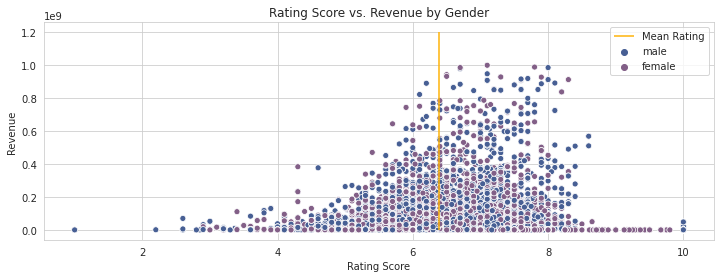

In [34]:
# plot rating score vs. revenue by gender

plt.vlines(x=np.mean(df['vote_average']), ymin=0, ymax=1.2e9, 
           colors=mp.colors(3), label='Mean Rating')
sns.scatterplot(x='vote_average', y='revenue', hue=df.gender.tolist(), data=df)

plt.xlabel('Rating Score')
plt.ylabel('Revenue')

plt.legend()
plt.title('Rating Score vs. Revenue by Gender');

The actors with the highest average movie revenue act in movies that have higher ratings.<br>
The actors with the largest average movie revenues are fairly well distributed between male and female actors.

 > **Budget by Tier**

In [35]:
# establish list of DataFrames to compare
df_lst = [df, top_df, elite_df]

In [36]:
# get correlation for all tiers between revenue and budget
get_tier_correlations(df_lst, 'revenue', 'budget', pearson_r, 10000)

,observed_pearson,95%_conf_interval
all_actors,0.502,"[0.478, 0.526]"
top_actors,0.267,"[0.203, 0.327]"
elite_actors,0.012,"[-0.166, 0.183]"


The correlation between revenue and budget decreases from moderate to weak, as we progress to the elite actors.

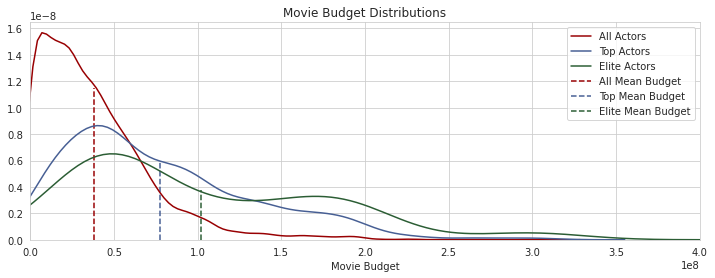

In [37]:
# plot movie budget distributions for actor classes

plt.xlim(0, 4e8)

plt.vlines(x=np.mean(df['budget']), ymin=0, ymax=1.15e-8, color=mp.colors(2), 
           label='All Mean Budget', linestyles='dashed')
sns.kdeplot(df['budget'],color=mp.colors(2), label='All Actors')

plt.vlines(x=np.mean(top_df['budget']), ymin=0, ymax=6e-9, color=mp.colors(0), 
          label='Top Mean Budget', linestyles='dashed')
sns.kdeplot(top_df['budget'], color=mp.colors(0),label='Top Actors')

plt.vlines(x=np.mean(elite_df['budget']), ymin=0, ymax=3.8e-9, color=mp.colors(4), 
          label='Elite Mean Budget', linestyles='dashed')
sns.kdeplot(elite_df['budget'], color=mp.colors(4),label='Elite Actors')

plt.xlabel('Movie Budget')

plt.legend()
plt.title('Movie Budget Distributions');

The average movie budgets increase as we go from all actors to the most elite ones.<br>
It makes sense that larger budgets would result in larger revenues, but the correlation gets weaker.

The average movie budget distribution for the elite actors is bimodal.<br>
This second mode is shifted to higher budget films.

 > **Age by Tier**

In [38]:
# get correlation for all tiers between revenue and age
get_tier_correlations(df_lst, 'revenue', 'age', pearson_r, 10000)

,observed_pearson,95%_conf_interval
all_actors,0.017,"[-0.004, 0.037]"
top_actors,-0.010,"[-0.071, 0.051]"
elite_actors,-0.107,"[-0.272, 0.063]"


The is almost no correlation between revenue and age until the elite tier, and there is is fairly weak.

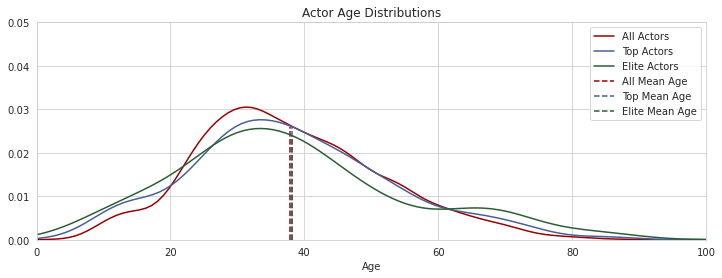

In [39]:
# plot age distributions for all actors vs. top actors

plt.xlim(0, 100)
plt.ylim(0, 0.05)

plt.vlines(x=np.mean(df['age']), ymin=0, ymax=0.026, color=mp.colors(2), 
           label='All Mean Age', linestyles='dashed')
sns.kdeplot(df['age'],color=mp.colors(2), label='All Actors')

plt.vlines(x=np.mean(top_df['age']), ymin=0, ymax=0.026, color=mp.colors(0), 
          label='Top Mean Age', linestyles='dashed')
sns.kdeplot(top_df['age'], color=mp.colors(0),label='Top Actors')

plt.vlines(x=np.mean(elite_df['age']), ymin=0, ymax=0.024, color=mp.colors(4), 
          label='Elite Mean Age', linestyles='dashed')
sns.kdeplot(elite_df['age'], color=mp.colors(4),label='Elite Actors')

plt.xlabel('Age')

plt.legend()
plt.title('Actor Age Distributions');

The average age of an actor is nearly identical throughout the tiers.<br>
There is a second mode in the elite actor distribution for actors in their sixties.

 > **Runtime by Tier**

In [40]:
# get correlation for all tiers between revenue and runtime
get_tier_correlations(df_lst, 'revenue', 'runtime', pearson_r, 10000)

,observed_pearson,95%_conf_interval
all_actors,0.207,"[0.183, 0.231]"
top_actors,0.118,"[0.059, 0.175]"
elite_actors,0.047,"[-0.151, 0.235]"


The weak correlation between revenue and runtime shrinks as we get to the elite tier.

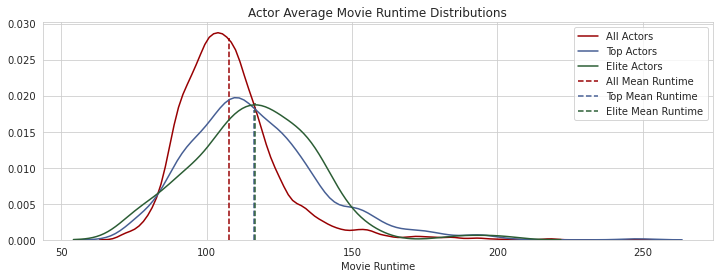

In [41]:
# plot runtime distributions for actor classes

plt.vlines(x=np.mean(df['runtime']), ymin=0, ymax=0.028, color=mp.colors(2), 
           label='All Mean Runtime', linestyles='dashed')
sns.kdeplot(df['runtime'],color=mp.colors(2), label='All Actors')

plt.vlines(x=np.mean(top_df['runtime']), ymin=0, ymax=0.018, color=mp.colors(0), 
          label='Top Mean Runtime', linestyles='dashed')
sns.kdeplot(top_df['runtime'], color=mp.colors(0),label='Top Actors')

plt.vlines(x=np.mean(elite_df['runtime']), ymin=0, ymax=0.019, color=mp.colors(4), 
          label='Elite Mean Runtime', linestyles='dashed')
sns.kdeplot(elite_df['runtime'], color=mp.colors(4),label='Elite Actors')

plt.xlabel('Movie Runtime')

plt.legend()
plt.title('Actor Average Movie Runtime Distributions');

The average runtime for all tiers of actors is constrained between an hour and forty-five minutes and two hours.<br>
The elite actor distribution has an small additional mode for movies with runtimes greater than three hours.

 > **Popularity by Tier**

In [42]:
# get correlation for all tiers between revenue and popularity
get_tier_correlations(df_lst, 'revenue', 'popularity', pearson_r, 10000)

,observed_pearson,95%_conf_interval
all_actors,0.386,"[0.35, 0.427]"
top_actors,0.240,"[0.15, 0.376]"
elite_actors,0.162,"[-0.006, 0.332]"


The moderate correlation between revenue and popularity in the full dataset becomes weak as we get to the elite tier.

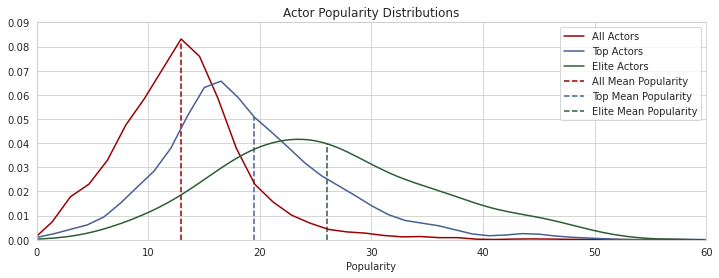

In [43]:
# plot actor popularity distributions for all actors vs. top actors

plt.xlim(0, 60)
plt.ylim(0, 0.09)

plt.vlines(x=np.mean(df['popularity']), ymin=0, ymax=0.082, color=mp.colors(2), 
           label='All Mean Popularity', linestyles='dashed')
sns.kdeplot(df['popularity'],color=mp.colors(2), label='All Actors')

plt.vlines(x=np.mean(top_df['popularity']), ymin=0, ymax=0.051, color=mp.colors(0), 
          label='Top Mean Popularity', linestyles='dashed')
sns.kdeplot(top_df['popularity'], color=mp.colors(0),label='Top Actors')

plt.vlines(x=np.mean(elite_df['popularity']), ymin=0, ymax=0.04, color=mp.colors(4), 
          label='Elite Mean Popularity', linestyles='dashed')
sns.kdeplot(elite_df['popularity'], color=mp.colors(4),label='Elite Actors')

plt.xlabel('Popularity')

plt.legend()
plt.title('Actor Popularity Distributions');

The popularity variable is a TMDb proprietary value that represents current intrest in a movie, based on website activity.<br>
The average movie popularity increases as we progress through the tiers.

 > **Rating Score by Tier**

In [44]:
# get correlation for all tiers between revenue and average rating score
get_tier_correlations(df_lst, 'revenue', 'vote_average', pearson_r, 10000)

,observed_pearson,95%_conf_interval
all_actors,0.197,"[0.181, 0.213]"
top_actors,0.220,"[0.17, 0.269]"
elite_actors,0.229,"[0.059, 0.389]"


The weak correlation between revenue and average rating score gets slightly stronger as we get to the top and elite actors.

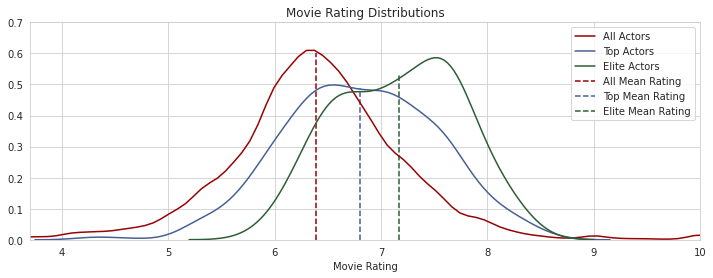

In [45]:
# plot movie rating distributions for all actors vs. top actors

plt.xlim(3.7, 10)
plt.ylim(0, 0.7)

plt.vlines(x=np.mean(df['vote_average']), ymin=0, ymax=0.6, color=mp.colors(2), 
           label='All Mean Rating', linestyles='dashed')
sns.kdeplot(df['vote_average'],color=mp.colors(2), label='All Actors')

plt.vlines(x=np.mean(top_df['vote_average']), ymin=0, ymax=0.49, color=mp.colors(0), 
          label='Top Mean Rating', linestyles='dashed')
sns.kdeplot(top_df['vote_average'], color=mp.colors(0),label='Top Actors')

plt.vlines(x=np.mean(elite_df['vote_average']), ymin=0, ymax=0.53, color=mp.colors(4), 
          label='Elite Mean Rating', linestyles='dashed')
sns.kdeplot(elite_df['vote_average'], color=mp.colors(4),label='Elite Actors')

plt.xlabel('Movie Rating')

plt.legend()
plt.title('Movie Rating Distributions');

The average movie rating increases as we go from all actors to the most elite ones.<br>
This points to reviewers giving higher ratings to actors who are in higher revenue films.<br>
The distribution for elite actors has a strong second mode in the highest ratings.<br>
There is a uniform shift to lower ratings when it comes to those for the random actor.

 > **Number of Ratings by Tier**

In [46]:
# get correlation for all tiers between revenue and number of ratings
get_tier_correlations(df_lst, 'revenue', 'vote_count', pearson_r, 10000)

,observed_pearson,95%_conf_interval
all_actors,0.539,"[0.512, 0.565]"
top_actors,0.393,"[0.331, 0.453]"
elite_actors,0.101,"[-0.063, 0.252]"


The moderate corelation between revenue and number of ratings becomes weak at the elite tier.

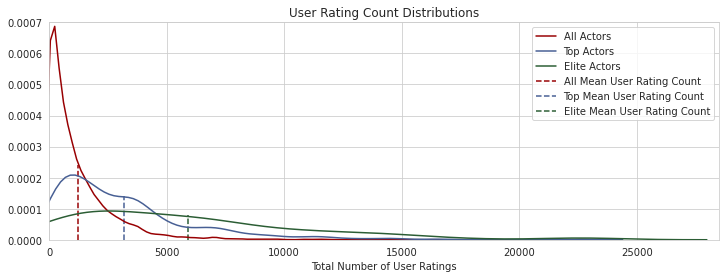

In [47]:
# plot total number of user ratings distributions for all actors vs. top actors

plt.xlim(0, 2.85e4)
plt.ylim(0, 7e-4)

plt.vlines(x=np.mean(df['vote_count']), ymin=0, ymax=2.4e-4, color=mp.colors(2), 
           label='All Mean User Rating Count', linestyles='dashed')
sns.kdeplot(df['vote_count'],color=mp.colors(2), label='All Actors')

plt.vlines(x=np.mean(top_df['vote_count']), ymin=0, ymax=1.4e-4, color=mp.colors(0), 
          label='Top Mean User Rating Count', linestyles='dashed')
sns.kdeplot(top_df['vote_count'], color=mp.colors(0),label='Top Actors')

plt.vlines(x=np.mean(elite_df['vote_count']), ymin=0, ymax=8.1e-5, color=mp.colors(4), 
          label='Elite Mean User Rating Count', linestyles='dashed')
sns.kdeplot(elite_df['vote_count'], color=mp.colors(4),label='Elite Actors')

plt.xlabel('Total Number of User Ratings')

plt.legend()
plt.title('User Rating Count Distributions');

The average number of total user ratings increases as we go from all actors to the most elite ones.<br>
This supports the idea that name recognition will drive revenue numbers.<br>
This is commonly referred to as star power.

There are clear trends that will be helpful for making predictions about which actors will have the highest movie revenues.

Now, I will rank the actors by their tier.

In [48]:
# create top actor binary feature
df['is_top'] = df['revenue'].transform(
    lambda x: int(x >= np.min(top_df['revenue']) ))

In [49]:
# create elite actor binary feature
df['is_elite'] = df['revenue'].transform(
    lambda x: int(x >= np.min(elite_df['revenue']) ))

In [50]:
# create actor rank feature
df['rank'] = df['is_top'] + df['is_elite']

In [51]:
# observe DataFrame without looking at genres
df.drop(genre_lst, axis=1).head(3)

,revenue,budget,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count,is_top,is_elite,rank
all_actors,,,,,,,,,,,,,,
2,1.747277e+07,8.778750e+06,45.773425,male,1.400000,13.497800,1997.000000,86.200000,1,6.620000,556.600000,0,0,0
3,1.142995e+08,8.345003e+07,56.479322,male,0.783784,22.042243,1998.540541,118.027027,1,6.562162,1868.351351,0,0,0
4,1.366157e+07,2.402895e+07,38.717047,female,4.000000,8.555667,1995.111111,102.000000,1,6.044444,467.000000,0,0,0


The newly created rank feature has values of 2 for the elite 1%, 1 for top 10%, and 0 for all other actors.<br>
Note that rank 1 does not include the top 1% of actors, unlike the previous top tier did.<br>
This is the main difference between the groupings.

In [52]:
# combine genres into feature and sum over each tier of actors
genre_count_df = pd.melt(df, 
                   id_vars=['gender', 'is_top', 'is_elite'], 
                   value_vars = genre_lst, 
                   var_name = 'genre', 
                   value_name = 'all_actors')

In [53]:
# drop observations without genre
genre_count_df = genre_count_df.loc[genre_count_df['all_actors'] > 0]

In [54]:
# group tiered actors by genres of their films
genre_count_df = genre_count_df.groupby('genre', as_index=False).agg(sum)

In [55]:
# observe DataFrame
genre_count_df.head(3)

,genre,is_top,is_elite,all_actors
0,action,463,51,10942
1,adventure,473,60,7272
2,animation,164,26,1950


Now, I have the actors grouped by their movie genres and tiers.<br>
I will plot the counts of actors over the movie genres by actor tier.

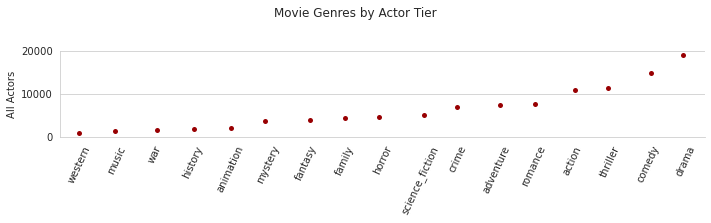

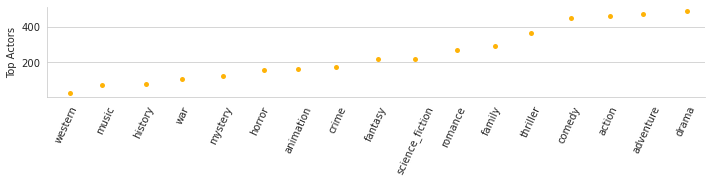

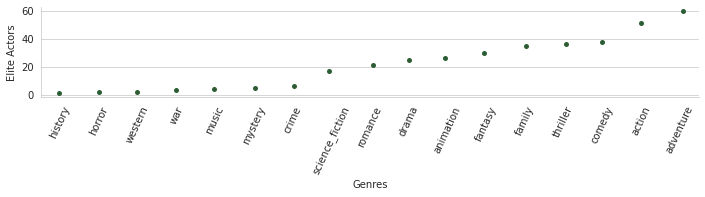

In [56]:
# plot genres by actor ranks

ax = sns.catplot(data=genre_count_df.sort_values('all_actors'), 
                 x='genre', y='all_actors', height=2, aspect=5, 
                 color=mp.colors(2), label='All Actors').set_xticklabels(rotation=65)
plt.xlabel('')
plt.ylabel('All Actors')

sns.catplot(data=genre_count_df.sort_values('is_top'), x='genre', y='is_top', 
            height=2, aspect=5, color=mp.colors(3)).set_xticklabels(rotation=65)
plt.xlabel('')
plt.ylabel('Top Actors')

sns.catplot(data=genre_count_df.sort_values('is_elite'), x='genre', y='is_elite', 
            height=2, aspect=5, color=mp.colors(4)).set_xticklabels(rotation=65)
plt.xlabel('Genres')
plt.ylabel('Elite Actors')

ax.fig.suptitle('Movie Genres by Actor Tier', y=1.2);

The importances of crime, drama, horror, romance, and science fiction movies decline once we get to the elite actors.

Six genres are elevated by the elite tier actors: action, adventure, animation, family, fantasy, and music.

History, war, and western movies are consistantly at the bottom of earning options for any tiered actor.

Here, I will take a closer look at the types of actors and movies that occupy the highest range of revenues.

In [57]:
def sort_elite_genre(genre, least_num_movies=1, gender=''):
    """Return DataFrame of elite actors in multiple mopvies of chosen genre"""
    # remove gender not selected
    if gender == 'female':
        gender_df = actor_df[actor_df['gender'] == 1]
    elif gender == 'male':
        gender_df = actor_df[actor_df['gender'] == 0]
    else:
        gender_df = actor_df.copy()
    # extract elite actors in more than 1 movie of the chosen genre
    multiple_movies_df = gender_df[gender_df['person_id'].isin(
        elite_df[elite_df[genre] >= least_num_movies].index)]
    # sort by revenue and drop movies not in genre category
    elite_genre_df = multiple_movies_df[multiple_movies_df[genre] > 0].drop(
        genre_lst, axis=1).sort_values(
        'revenue', ascending=False)
    # get count of elite actors in multiple movies in genre
    num_multiple_elite = len(
        multiple_movies_df[multiple_movies_df[genre] > 0]['name'].unique())
    # get DataFrame of elite actors in at least one movie in genre
    any_movies_df = gender_df[gender_df['person_id'].isin(
        elite_df[elite_df[genre] > 0].index)]
    # get count of elite actors in at least one movie in genre
    num_elite = len(
        any_movies_df[any_movies_df[genre] > 0]['name'].unique())
    word = genre.split('_')
    if len(word) > 1:
        genre = word[0] + ' ' + word[1]
    if gender != '':
        gender = gender + ' '
    if least_num_movies >= 2:
        print(
            num_multiple_elite, 'out of', 
            num_elite, 'elite ' + gender + 'actors in', genre, 'films, were in at least', 
            least_num_movies, 'of them.')
    else:
        print(
            num_elite, 'elite ' + gender + 'actors were in at least one', genre, 'film.')
    
    return elite_genre_df

In [58]:
# show elite actors appearing in movies by genre
sort_elite_genre('adventure', least_num_movies=2)

5 out of 60 elite actors in adventure films, were in at least 2 of them.


,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
15177,9874,Bernard Lee,253,Live and Let Die,9.426024e+08,4.078567e+07,9.018167e+08,65.485260,0,8,23.992,1973,121,0,6.5,1093
39119,998225,Alison Sudol,259316,Fantastic Beasts and Where to Find Them,8.655513e+08,1.925010e+08,6.730502e+08,31.899355,1,4,39.470,2016,133,1,7.4,13877
15172,9874,Bernard Lee,667,You Only Live Twice,8.649161e+08,7.363641e+07,7.912797e+08,59.423534,0,7,32.113,1967,117,0,6.6,1146
38716,556356,Vanessa Kirby,353081,Mission: Impossible - Fallout,8.101929e+08,1.823150e+08,6.278779e+08,30.234707,1,7,32.950,2018,148,0,7.3,4946
15174,9874,Bernard Lee,691,The Spy Who Loved Me,7.846640e+08,5.923951e+07,7.254245e+08,69.490818,0,7,18.321,1977,125,0,6.7,1035
15418,10173,George Baker,691,The Spy Who Loved Me,7.846640e+08,5.923951e+07,7.254245e+08,46.267891,0,8,18.321,1977,125,0,6.7,1035
15732,10462,Geoffrey Keen,691,The Spy Who Loved Me,7.846640e+08,5.923951e+07,7.254245e+08,60.877362,0,6,18.321,1977,125,0,6.7,1035
38717,556356,Vanessa Kirby,384018,Fast & Furious Presents: Hobbs & Shaw,7.647119e+08,2.012138e+08,5.634981e+08,31.286063,1,3,53.873,2019,137,0,6.8,3426
15173,9874,Bernard Lee,698,Moonraker,7.508115e+08,1.213819e+08,6.294297e+08,71.459373,0,5,22.474,1979,126,0,6.1,1082
15733,10462,Geoffrey Keen,698,Moonraker,7.508115e+08,1.213819e+08,6.294297e+08,62.845917,0,6,22.474,1979,126,0,6.1,1082


The Bond series of films can be credited with most of the adventure movies with elite actors.<br>
Although this is technically a series, there has been enough cast turnover throughout the years to not ba a concern.<br>
Vanessa Kirby was in two different big adventure series, Mission Impossible and Fast & Furious.<br>
Being in multiple series would be better for modelling than being in one series, given the same number of appearances.

In [59]:
# show elite actors appearing in movies by genre
sort_elite_genre('action', least_num_movies=2)

4 out of 51 elite actors in action films, were in at least 2 of them.


,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
15177,9874,Bernard Lee,253,Live and Let Die,9.426024e+08,4.078567e+07,9.018167e+08,65.485260,0,8,23.992,1973,121,0,6.5,1093
15172,9874,Bernard Lee,667,You Only Live Twice,8.649161e+08,7.363641e+07,7.912797e+08,59.423534,0,7,32.113,1967,117,0,6.6,1146
38716,556356,Vanessa Kirby,353081,Mission: Impossible - Fallout,8.101929e+08,1.823150e+08,6.278779e+08,30.234707,1,7,32.950,2018,148,0,7.3,4946
15174,9874,Bernard Lee,691,The Spy Who Loved Me,7.846640e+08,5.923951e+07,7.254245e+08,69.490818,0,7,18.321,1977,125,0,6.7,1035
15418,10173,George Baker,691,The Spy Who Loved Me,7.846640e+08,5.923951e+07,7.254245e+08,46.267891,0,8,18.321,1977,125,0,6.7,1035
15732,10462,Geoffrey Keen,691,The Spy Who Loved Me,7.846640e+08,5.923951e+07,7.254245e+08,60.877362,0,6,18.321,1977,125,0,6.7,1035
38717,556356,Vanessa Kirby,384018,Fast & Furious Presents: Hobbs & Shaw,7.647119e+08,2.012138e+08,5.634981e+08,31.286063,1,3,53.873,2019,137,0,6.8,3426
15173,9874,Bernard Lee,698,Moonraker,7.508115e+08,1.213819e+08,6.294297e+08,71.459373,0,5,22.474,1979,126,0,6.1,1082
15733,10462,Geoffrey Keen,698,Moonraker,7.508115e+08,1.213819e+08,6.294297e+08,62.845917,0,6,22.474,1979,126,0,6.1,1082
15179,9874,Bernard Lee,657,From Russia with Love,6.611998e+08,1.676071e+07,6.444391e+08,55.752000,0,3,27.729,1963,115,0,7.1,1629


Not surprisingly, action and adventure go hand in hand.<br>
The clustering of multiple genres has been analyzed in another notebook.<br>
The Fantastic Beasts series must be considered purely adventure movies, as it didn't make the previous list.

In [60]:
# show elite actors appearing in movies by genre
sort_elite_genre('family', least_num_movies=1)

35 elite actors were in at least one family film.


,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
40182,1371894,Kaitlyn Dias,150540,Inside Out,9.276071e+08,1.892830e+08,7.383241e+08,16.079728,1,6,43.536,2015,95,0,7.9,14731
19966,15827,Scott Weinger,812,Aladdin,9.162178e+08,5.089592e+07,8.653218e+08,17.142036,0,0,36.701,1992,90,0,7.6,7792
38294,228428,Brad Kane,812,Aladdin,9.162178e+08,5.089592e+07,8.653218e+08,19.157135,0,8,36.701,1992,90,0,7.6,7792
19969,15830,Jonathan Freeman,812,Aladdin,9.162178e+08,5.089592e+07,8.653218e+08,42.889313,0,3,36.701,1992,90,0,7.6,7792
3234,1066,Claudia Wells,105,Back to the Future,9.125245e+08,4.549337e+07,8.670312e+08,18.995599,1,5,36.687,1985,116,0,8.3,12955
3239,1068,Wendie Jo Sperber,105,Back to the Future,9.125245e+08,4.549337e+07,8.670312e+08,26.798634,1,7,36.687,1985,116,0,8.3,12955
32610,64870,Peggy Lee,10340,Lady and the Tramp,9.080756e+08,3.866891e+07,8.694067e+08,35.072589,1,0,26.949,1955,76,1,7.1,3439
36917,124506,George Givot,10340,Lady and the Tramp,9.080756e+08,3.866891e+07,8.694067e+08,52.340568,0,8,26.949,1955,76,1,7.1,3439
32957,67230,Bill Thompson,10340,Lady and the Tramp,9.080756e+08,3.866891e+07,8.694067e+08,41.955687,0,3,26.949,1955,76,1,7.1,3439
32614,64872,Larry Roberts,10340,Lady and the Tramp,9.080756e+08,3.866891e+07,8.694067e+08,28.731596,0,2,26.949,1955,76,1,7.1,3439


The diversity of the films above is refreshing to see.<br>
There are many movies in this list that are not in the animation genre.<br>
I will show these below.

In [61]:
# perform redirection to prevent sort elite genre function from printing its output text
enable_print  = print
disable_print = lambda *x, **y: None
print = disable_print

In [62]:
# get set difference of family and animation genres
sort_elite_genre(
    'family', least_num_movies=1)[~sort_elite_genre(
    'family', least_num_movies=1).isin(sort_elite_genre(
    'animation', least_num_movies=1))].dropna(how = 'all')

,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
3234,1066.0,Claudia Wells,105.0,Back to the Future,9.125245e+08,4.549337e+07,8.670312e+08,18.995599,1.0,5.0,36.687,1985.0,116.0,0.0,8.3,12955.0
3239,1068.0,Wendie Jo Sperber,105.0,Back to the Future,9.125245e+08,4.549337e+07,8.670312e+08,26.798634,1.0,7.0,36.687,1985.0,116.0,0.0,8.3,12955.0
39119,998225.0,Alison Sudol,259316.0,Fantastic Beasts and Where to Find Them,8.655513e+08,1.925010e+08,6.730502e+08,31.899355,1.0,4.0,39.470,2016.0,133.0,1.0,7.4,13877.0
11240,5831.0,Arthur Treacher,433.0,Mary Poppins,8.515524e+08,4.995774e+07,8.015947e+08,70.095895,0.0,8.0,18.971,1964.0,139.0,0.0,7.6,3172.0
11238,5829.0,Karen Dotrice,433.0,Mary Poppins,8.515524e+08,4.995774e+07,8.015947e+08,8.799633,1.0,5.0,18.971,1964.0,139.0,0.0,7.6,3172.0
11239,5830.0,Matthew Garber,433.0,Mary Poppins,8.515524e+08,4.995774e+07,8.015947e+08,8.424540,0.0,6.0,18.971,1964.0,139.0,0.0,7.6,3172.0
21494,17834.0,Jake Cherry,1593.0,Night at the Museum,7.347974e+08,1.406970e+08,5.941005e+08,10.094663,0.0,1.0,19.816,2006.0,108.0,0.0,6.5,6969.0
21506,17836.0,Kim Raver,1593.0,Night at the Museum,7.347974e+08,1.406970e+08,5.941005e+08,37.599677,1.0,8.0,19.816,2006.0,108.0,0.0,6.5,6969.0
39118,998225.0,Alison Sudol,338952.0,Fantastic Beasts: The Crimes of Grindelwald,6.691093e+08,2.048223e+08,4.642870e+08,33.892551,1.0,2.0,34.908,2018.0,134.0,1.0,6.9,6644.0
17066,11517.0,Gerry Bamman,772.0,Home Alone 2: Lost in New York,6.525490e+08,3.271880e+07,6.198302e+08,51.171482,0.0,7.0,24.608,1992.0,120.0,0.0,6.6,5999.0


In [63]:
# re-enable print function
print = enable_print

In [64]:
# show elite actors appearing in movies by genre
sort_elite_genre('comedy', least_num_movies=1)

38 elite actors were in at least one comedy film.


,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
33035,67787,Karen Lynn Gorney,11009,Saturday Night Fever,9.855470e+08,1.454754e+07,9.709995e+08,32.882263,1,1,14.295,1977,118,0,6.7,1017
14905,9628,Mike Nussbaum,607,Men in Black,9.478538e+08,1.447374e+08,8.031164e+08,73.510065,0,7,34.386,1997,98,0,7.1,9368
2469,747,Alex Hyde-White,114,Pretty Woman,9.285722e+08,2.807778e+07,9.004944e+08,31.143692,0,5,18.913,1990,119,0,7.3,4642
3599,1209,Elinor Donahue,114,Pretty Woman,9.285722e+08,2.807778e+07,9.004944e+08,52.926480,1,7,18.913,1990,119,0,7.3,4642
3630,1219,Amy Yasbeck,114,Pretty Woman,9.285722e+08,2.807778e+07,9.004944e+08,27.526917,1,6,18.913,1990,119,1,7.3,4642
40182,1371894,Kaitlyn Dias,150540,Inside Out,9.276071e+08,1.892830e+08,7.383241e+08,16.079728,1,6,43.536,2015,95,0,7.9,14731
3234,1066,Claudia Wells,105,Back to the Future,9.125245e+08,4.549337e+07,8.670312e+08,18.995599,1,5,36.687,1985,116,0,8.3,12955
3239,1068,Wendie Jo Sperber,105,Back to the Future,9.125245e+08,4.549337e+07,8.670312e+08,26.798634,1,7,36.687,1985,116,0,8.3,12955
37271,139820,Pom Klementieff,283995,Guardians of the Galaxy Vol. 2,9.117649e+08,2.111163e+08,7.006486e+08,30.962990,1,7,44.477,2017,137,0,7.6,14699
27471,37712,Dana Elcar,9277,The Sting,8.917612e+08,3.072798e+07,8.610332e+08,46.210394,0,8,13.019,1973,129,0,8.1,1359


As desired, there are many elite actors contributing to the total performances in each genre.<br>
I feel good about the variety of both actors and movies in the upper revenue range.

Finally, I will bring gender into fold, while still counting the actors over the genres.

In [65]:
# combine genres into feature and sum over all actors
gender_rank_df = pd.melt(df, 
                   id_vars=['gender', 'rank'], 
                   value_vars = genre_lst, 
                   var_name = 'genre', 
                   value_name = 'count')

In [66]:
# drop observations without genre
gender_rank_df = gender_rank_df.loc[gender_rank_df['count'] > 0]

In [67]:
# observe DataFrame
gender_rank_df.head()

,gender,rank,genre,count
0,male,0,action,2
1,male,0,action,13
9,female,0,action,2
13,male,0,action,3
14,female,0,action,3


Now, I have the actors grouped by their movie genres, genders, and ranks.

In [68]:
def plot_genres():
    """Plot distribution of genres by actor rank and gender"""
    sns.set(font_scale=6)
    
    g = sns.catplot(x='genre', hue='gender', row='rank', data=gender_rank_df, 
                    kind='count', sharey=False, height=10, aspect=4, 
                    palette=my_palette[:2])
    
    g.set_xticklabels(fontsize=50, rotation=70)

    plt.xlabel('Genre', fontsize=80)

    g.fig.suptitle('Movie Genres by Actor Rank', y=1.03)

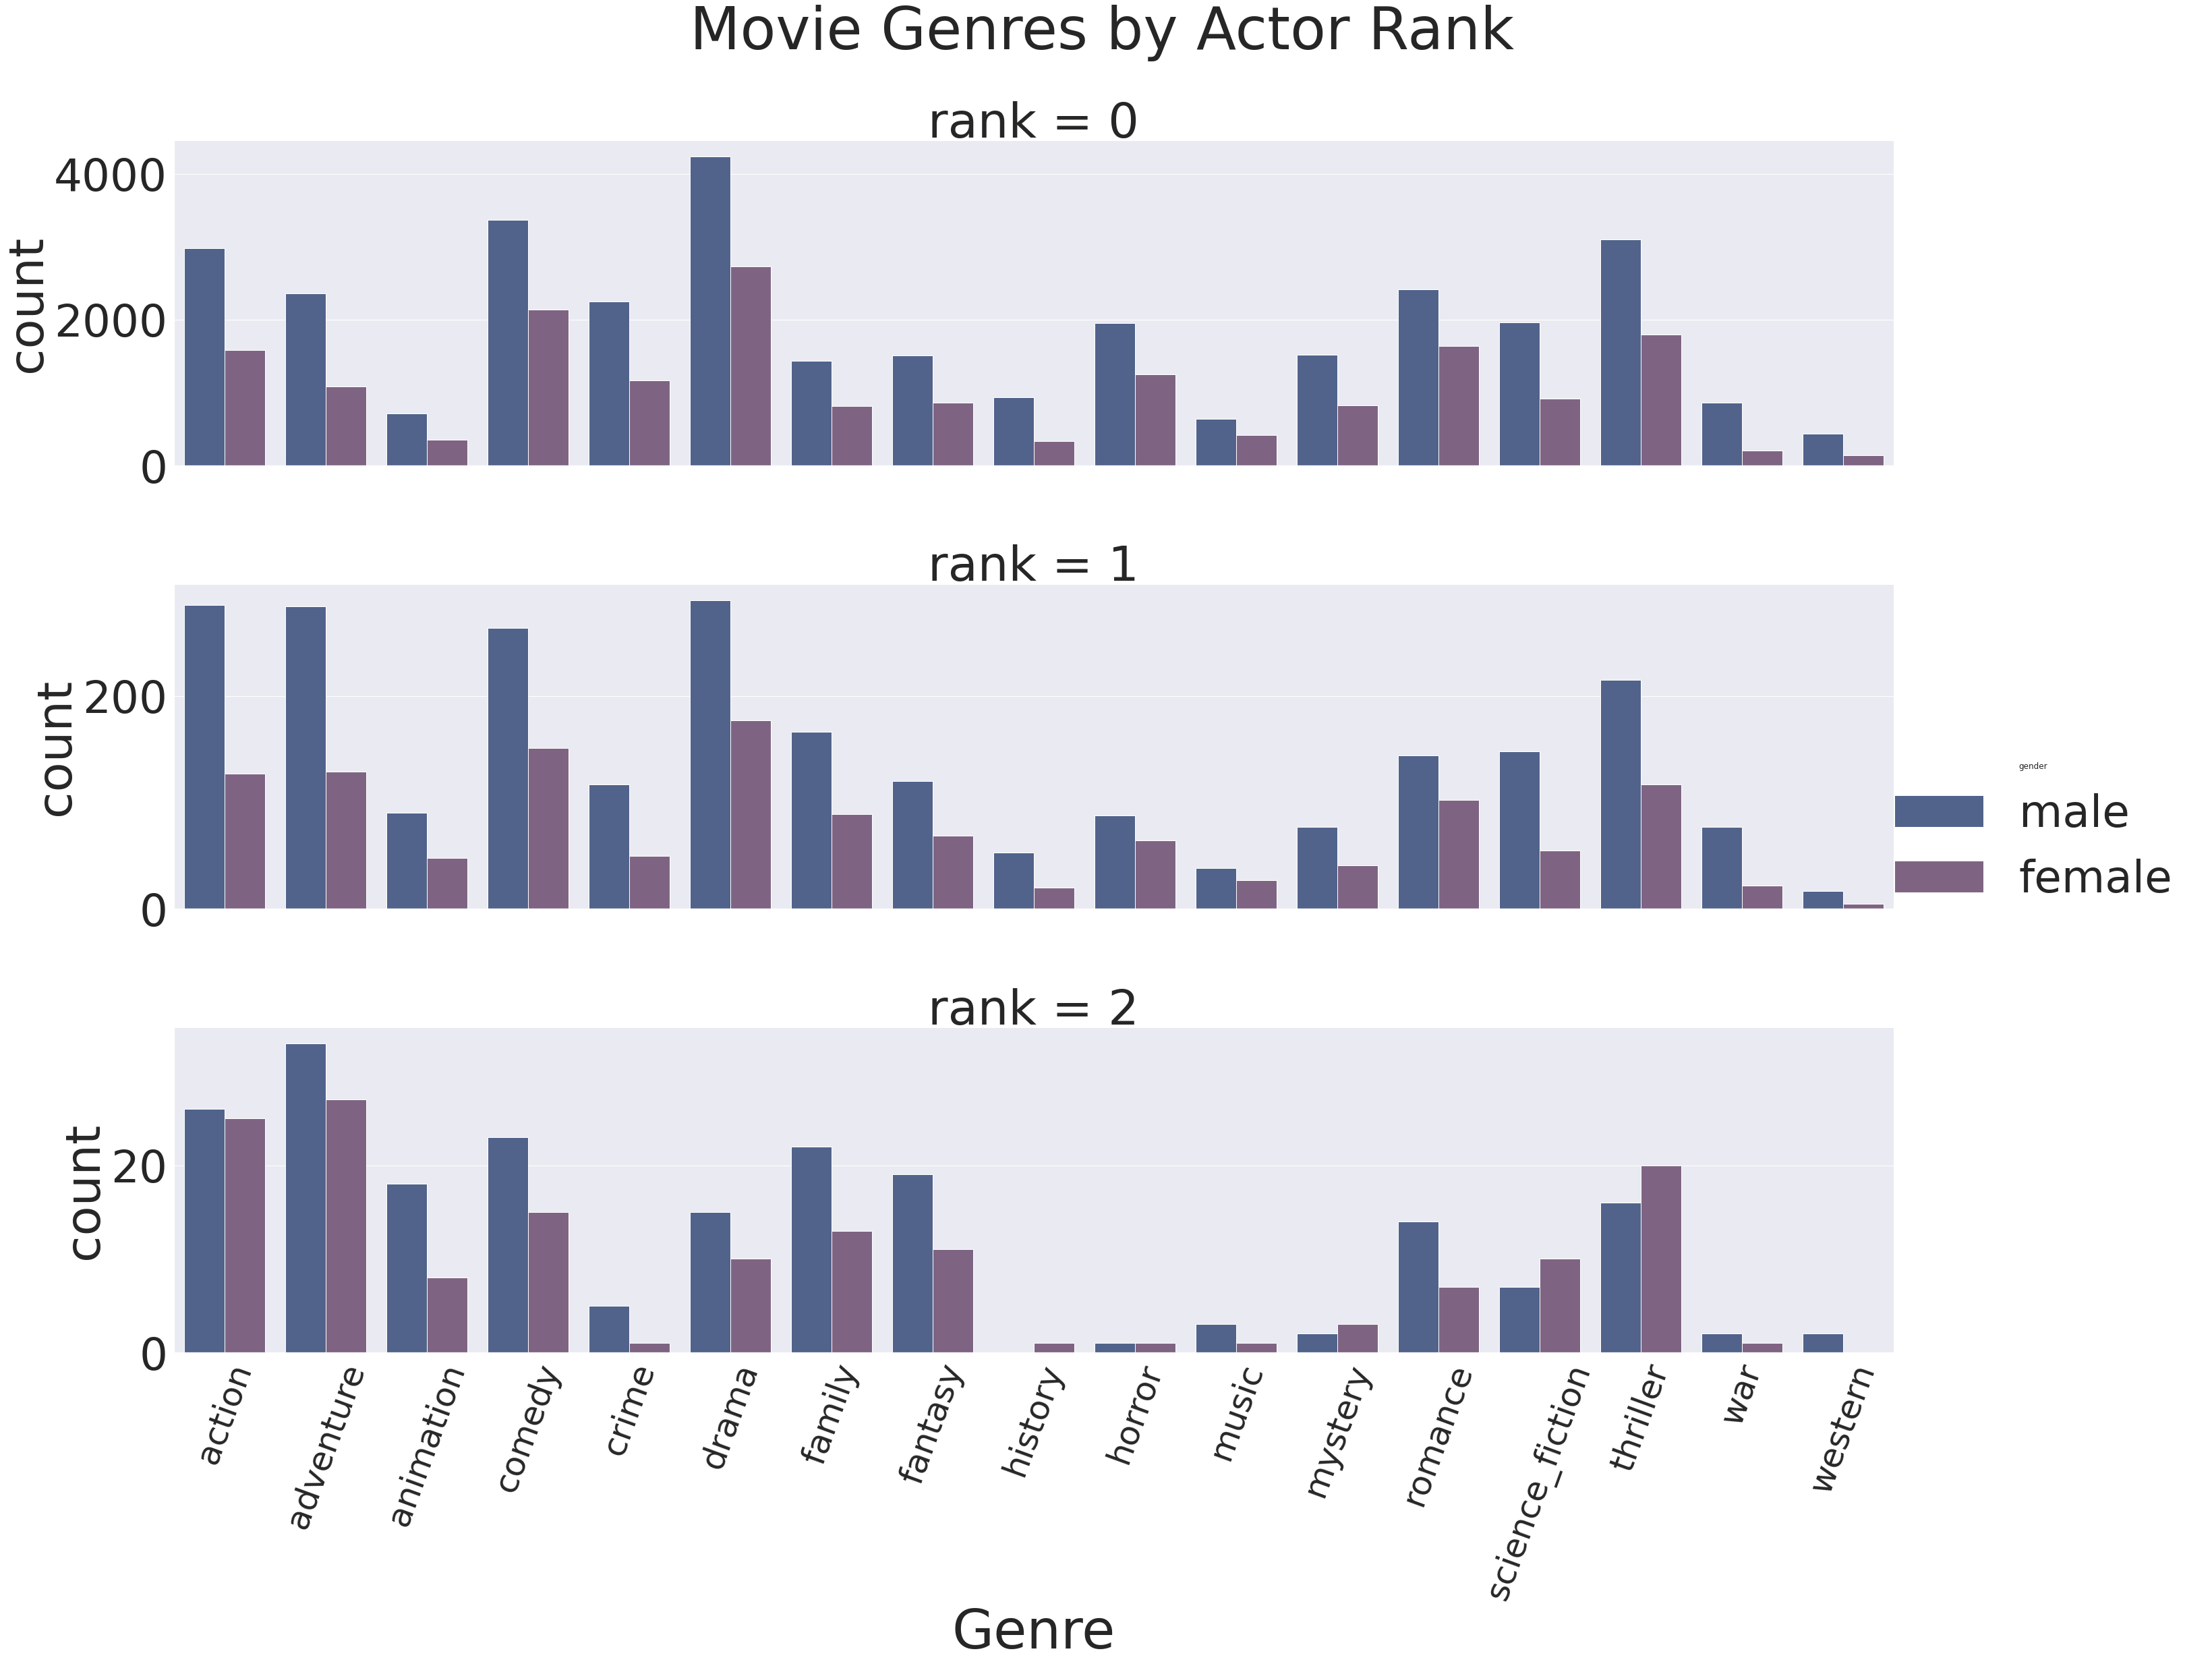

In [69]:
# plot distributions of genres by actor rank and gender
plot_genres()

The genres of action, adventure, and comedy are the most dominant ones among the rank 2 actors.<br>
Rank 0 actors tend to have roles in action, comedy, drama, and thriller movies.<br>
These two observations can be seen in the previous plot, as well.

The proportion of female actors by genre is fairly consistant in ranks 0 and 1.<br>
They outnumber the male actors in the genres of history, mystery, science fiction, and thriller.<br>
I will observe some of the elite female actor roles.

In [70]:
# show elite actors appearing in movies by genre
sort_elite_genre('science_fiction', gender='female')

10 elite female actors were in at least one science fiction film.


,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
26609,33190,Pernilla August,1894,Star Wars: Episode II - Attack of the Clones,9.322550e+08,1.722681e+08,7.599869e+08,44.250053,1,7,35.960,2002,142,0,6.5,8635
38605,505710,Zendaya,315635,Spider-Man: Homecoming,9.280935e+08,1.845290e+08,7.435644e+08,20.840948,1,6,42.614,2017,133,1,7.4,14058
3234,1066,Claudia Wells,105,Back to the Future,9.125245e+08,4.549337e+07,8.670312e+08,18.995599,1,5,36.687,1985,116,0,8.3,12955
3239,1068,Wendie Jo Sperber,105,Back to the Future,9.125245e+08,4.549337e+07,8.670312e+08,26.798634,1,7,36.687,1985,116,0,8.3,12955
37271,139820,Pom Klementieff,283995,Guardians of the Galaxy Vol. 2,9.117649e+08,2.111163e+08,7.006486e+08,30.962990,1,7,44.477,2017,137,0,7.6,14699
26731,33500,Takayo Fischer,74,War of the Worlds,7.852792e+08,1.751732e+08,6.101061e+08,72.590128,1,8,18.631,2005,116,0,6.4,5274
15739,10476,Corinne Cléry,698,Moonraker,7.508115e+08,1.213819e+08,6.294297e+08,29.260012,1,3,22.474,1979,126,0,6.1,1082
14785,9364,Gloria Foster,603,The Matrix,7.250957e+08,9.855300e+07,6.265427e+08,65.370268,1,5,37.766,1999,136,1,8.1,16845
37530,151246,Nicole Scherzinger,41154,Men in Black 3,7.008710e+08,2.527071e+08,4.481639e+08,33.900765,1,7,19.380,2012,106,1,6.4,7349
40357,1464650,Dafne Keen,263115,Logan,6.558980e+08,1.027785e+08,5.531195e+08,12.150831,1,2,37.737,2017,137,0,7.8,14092


There is a diverse selection of roles in these science fiction films.

In [71]:
# show elite actors appearing in movies by genre
sort_elite_genre('thriller', gender='female')

20 elite female actors were in at least one thriller film.


,person_id,name,movie_id,title,revenue,budget,profit,age,gender,order,popularity,release_date,runtime,usa,vote_average,vote_count
8213,3420,Armelia McQueen,251,Ghost,9.996018e+08,4.354701e+07,9.560548e+08,38.514138,1,8,17.725,1990,127,1,7.1,3395
6402,2405,Audrey Tautou,591,The Da Vinci Code,9.786962e+08,1.593302e+08,8.193659e+08,29.769263,1,1,24.421,2006,149,0,6.7,6129
15518,10227,Gloria Hendry,253,Live and Let Die,9.426024e+08,4.078567e+07,9.018167e+08,24.339993,1,7,23.992,1973,121,1,6.5,1093
33181,69103,Lori Martin,11349,Cape Fear,8.803260e+08,2.991399e+08,5.811861e+08,14.984565,1,3,9.400,1962,105,0,7.5,267
37003,127638,Barrie Chase,11349,Cape Fear,8.803260e+08,2.991399e+08,5.811861e+08,28.476971,1,6,9.400,1962,105,1,7.5,267
15306,10068,Akiko Wakabayashi,667,You Only Live Twice,8.649161e+08,7.363641e+07,7.912797e+08,25.796560,1,1,32.113,1967,117,0,6.6,1146
15307,10070,Mie Hama,667,You Only Live Twice,8.649161e+08,7.363641e+07,7.912797e+08,23.562428,1,2,32.113,1967,117,0,6.6,1146
26731,33500,Takayo Fischer,74,War of the Worlds,7.852792e+08,1.751732e+08,6.101061e+08,72.590128,1,8,18.631,2005,116,0,6.4,5274
15731,10461,Caroline Munro,691,The Spy Who Loved Me,7.846640e+08,5.923951e+07,7.254245e+08,28.471495,1,4,18.321,1977,125,0,6.7,1035
16256,10916,Caterina Murino,36557,Casino Royale,7.673586e+08,1.921452e+08,5.752134e+08,29.164185,1,6,31.699,2006,144,0,7.5,7018


The appearence of the "Bond Girls" can't be missed.<br>
Although, it's good to see many other roles, here, with a bit more diversity.

Just quickly, I'll break down the raw count of actors in each rank by gender.

In [72]:
# observe percentage of all actors who are male
(df['gender'].value_counts() / df.shape[0])[0] * 100

60.83548664944014

In [73]:
# observe percentage of rank 0 actors who are male
(df[df['rank'] == 0]['gender'].value_counts() / df[df['rank'] == 0].shape[0])[0] * 100

60.58198525892601

In [74]:
# observe percentage of rank 1 actors who are male
(df[df['rank'] == 1]['gender'].value_counts() / df[df['rank'] == 1].shape[0])[0] * 100

63.862332695984705

In [75]:
# observe percentage of rank 2 actors who are male
(df[df['rank'] == 2]['gender'].value_counts() / df[df['rank'] == 2].shape[0])[0] * 100

56.41025641025641

The genders are distributed in a similar proportion in rank 0, as they are in the general actor population.<br>
It is more common for rank 1 actors to be male, compared to the other ranks.<br>
Female actors are a larger percentage of rank 2 actors, than they are of ranks 0 or 1 actors.<br>

The dataset looks a little healthier, after the removal of the movie revenue outliers.<br>
This is especially noticeable in the correlations, as none of the significant ones went from positive to negative.<br>
I feel that the data is ready to use for model training.